In [1]:
from transformers import BertTokenizer, BertModel
from datasets import load_dataset
import torch
import os

In [6]:
#getting and saving dataset

imdb_dataset = load_dataset("imdb")

imdb_dataset['train'].to_csv('imdb_train.csv', index = False)
imdb_dataset['test'].to_csv('imdb_test.csv', index = False)

Creating CSV from Arrow format:   0%|          | 0/25 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/25 [00:00<?, ?ba/s]

32540147

In [7]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('imdb_test.csv')
test_df = pd.read_csv('imdb_test.csv')

all_texts = pd.concat([train_df['text'], test_df['text']], ignore_index=True)

In [13]:
from tokenizers import models, trainers, pre_tokenizers, decoders, Tokenizer, processors

tokenizer = Tokenizer(model=models.WordPiece(unk_token="[UNK]"))

tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
tokenizer.decode = decoders.WordPiece(prefix="##")

trainer = trainers.WordPieceTrainer(
    vocab_size=30000,
    # min_frequency=2,
    special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"]
)

def batch_iterator(batch_size=1000):
    for i in range(0, len(all_texts), batch_size):
        yield all_texts[i:i+batch_size].tolist()


tokenizer.train_from_iterator(batch_iterator(), trainer=trainer)

tokenizer.save("custom_tokenizer.json")

In [14]:
from collections import Counter
import matplotlib.pyplot as plt

vocab = tokenizer.get_vocab()

id2token = {id: token for token, id in vocab.items()}

token_freqs = Counter()

for batch in batch_iterator():
    encodings = tokenizer.encode_batch(batch)
    for encoding in encodings:
        tokens = encoding.tokens
        token_freqs.update(tokens)

sorted_token_freqs = token_freqs.most_common()

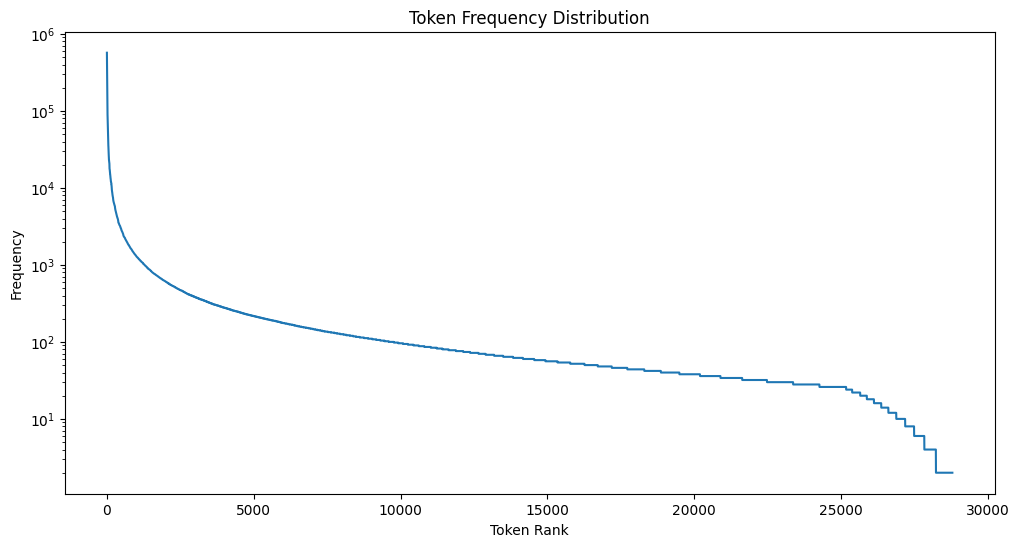

In [15]:
tokens, freqs = zip(*sorted_token_freqs)

plt.figure(figsize=(12, 6))
plt.plot(freqs)
plt.xlabel('Token Rank')
plt.ylabel('Frequency')
plt.title('Token Frequency Distribution')
plt.yscale('log')  
plt.show()


In [11]:
print(vocab)

{'loyalty': 12038, 'reviewed': 13673, 'induced': 16281, 'endure': 10160, 'repulsive': 13240, '##ICT': 19935, '##ibu': 22790, 'Raven': 25276, 'Walters': 15241, 'positives': 18002, 'Stars': 10709, 'communication': 12663, 'begun': 17454, 'Rudd': 26988, 'Harvey': 9885, 'interests': 11688, '##rant': 6329, 'inadvert': 14860, '##azine': 25500, 'Alyssa': 25956, 'NYPD': 24239, 'meal': 11463, 'senile': 17449, 'Pe': 2161, 'windows': 12943, 'Exorc': 9396, 'ensure': 13886, '##kel': 6427, 'abnormal': 25993, 'confuse': 12256, 'lasers': 24553, 'Muslims': 20976, 'thankful': 18737, 'Filip': 22504, 'realises': 17617, 'Tru': 6640, 'Brazilian': 14634, 'restrictions': 27697, 'MacLaine': 26838, 'penetrate': 26804, 'Arthur': 5476, 'terminally': 21910, 'Burroughs': 19258, 'disci': 13044, 'assembly': 27637, 'fit': 3109, 'freeway': 29478, 'contrary': 9135, '##urch': 3891, 'stinker': 8189, 'AC': 16418, 'whims': 18457, 'Enc': 23483, 'deliver': 1902, 'unlikeable': 10474, '##urer': 17008, 'crap': 2102, '##ori': 8298

In [12]:

import torch.nn as nn

embedding_dim = 1024
vocab_size = len(vocab)
max_seq_length = 512

num_segments = 10

torch.manual_seed(42)

token_embeddings = nn.Embedding(vocab_size, embedding_dim)
position_embedding = nn.Embedding(max_seq_length, embedding_dim)
segment_embedding = nn.Embedding(num_segments, embedding_dim)


print(f"Token embedding shape: {token_embeddings.weight.shape}")
print(f"Position embedding shape: {position_embedding.weight.shape}")
print(f"Segement embedding shape: {segment_embedding.weight.shape}")

Token embedding shape: torch.Size([30000, 1024])
Position embedding shape: torch.Size([512, 1024])
Segement embedding shape: torch.Size([10, 1024])


In [16]:
from transformers import BertConfig, BertModel

configuration = BertConfig()
model = BertModel(configuration)
model.config

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [ ]:
from datasets import load_dataset

data = load_dataset("stanfordnlp/sst2")